#**Import von Paketen**

In [46]:
#@title Einladen der notwendigen Pakete
#@markdown Führen Sie die Zelle über den linken "Play-Button" aus um die notwendigen Packages für die Pythonscripte zu laden.
#import the following for handling data in colab
from google.colab import files
#import numpy
import numpy as np
#import matplotlib
import matplotlib.pyplot as plt
import sys

from scipy.optimize import curve_fit

# Example data (replace this with your actual array)
x = np.linspace(-10, 10, 100)
data = np.exp(-(x - 2)**2 / (2 * 1.5**2)) + 0.1 * np.random.normal(size=x.size)

# Define a Gaussian function
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) ** 2) / (2 * stddev ** 2))

#**Auswertung des UV-VIS-Spektrums von Myoglobin**

In [3]:
#@title Einladen des **UV-VIS-Spektrums von Myoglobin**
#@markdown Führen Sie die Zelle über den linken "Play-Button" aus und wählen Sie "Durchsuchen" um das UV-VIS-Spektrum Ihrer Myoglobinprobe zu laden.
uvvisUpload = files.upload()
uvvisFileName = next(iter(uvvisUpload))


Saving Myo.ndv to Myo.ndv


In [4]:
#@title Herausschreiben der UV-VIS-Daten
with open(uvvisFileName, 'r') as f:
    lines = f.readlines()
    wl_row = lines[4].split('\t')[14:]
    wavelength = np.array(wl_row, dtype=float)
#    print(wavelength)
#    print(wavelength[1])


with open(uvvisFileName, 'r') as f:
    lines = f.readlines()
    names = []
    row = lines[5].split('\t')[14:]
    new_array = np.char.replace(row, ",", ".")
    numOfElemts = new_array.size
    data = np.zeros((len(lines)-5, numOfElemts))
    for i in range(5, len(lines)):
      name = lines[i].split('\t')[0]
      names.append(name)
      row = lines[i].split('\t')[14:]
      new_array = np.char.replace(row, ",", ".")
      data[i-5,:] = new_array


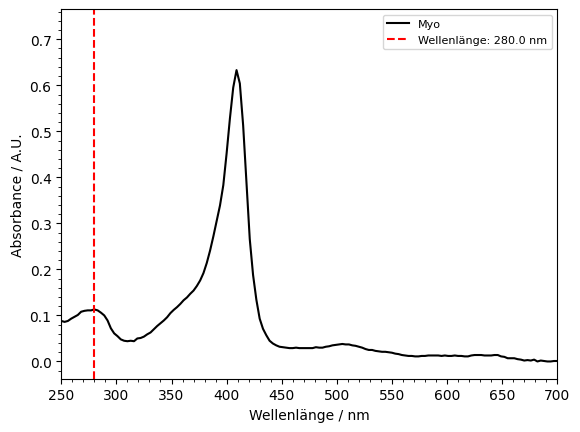

Ausgewählte Wellenlänge (in nm):
280.0
Absorbance / A.U. bei 280.0 nm:
[[0.113]]


In [8]:
#@title Darstellen des Spektrums

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

#@markdown Geben Sie die Wellenlänge (in nm) an, bei der auf die Proteinkonzentration geschlossen werden kann:
Wellenlänge_UV_VIS = 280 #@param {type:"integer"}
wl_select = find_nearest(wavelength, value=Wellenlänge_UV_VIS)
wl_index = np.where(wavelength == wl_select)
#@markdown Wählen Sie das anzuzeigende Spektrum (nur falls mehrere Spektren aufgenommen wurden relevant, default = 1)
UV_VIS_Spektrum_num = 1 #@param {type:"integer"}
UV_VIS_spec_num = UV_VIS_Spektrum_num - 1

Achsenbeschriftung_X =  'Wellenlänge / nm' #@param {type:"string"}
Achsenbeschriftung_Y = 'Absorbance / A.U.' #@param {type:"string"}

plt.plot(wavelength, data[UV_VIS_spec_num,:], color="black",label = names[UV_VIS_spec_num])
plt.axvline(x = Wellenlänge_UV_VIS, color = 'r', linestyle='dashed',label = 'Wellenlänge: '+ str(wl_select) + " nm")
plt.xlim(250,700)
plt.xlabel(Achsenbeschriftung_X)
plt.ylabel(Achsenbeschriftung_Y)

plt.minorticks_on()

plt.legend(prop={'size': 8})

plt.savefig('UV_VIS.png', dpi=300)

plt.show()

abs = data[UV_VIS_spec_num,wl_index]
print("Ausgewählte Wellenlänge (in nm):")
print(str(wl_select))
print(Achsenbeschriftung_Y + " bei " + str(wl_select) + " nm:")
print(str(data[UV_VIS_spec_num,wl_index]))


In [9]:
#@title Download des UV-VIS-Spektrums
files.download('UV_VIS.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#**Auswertung des CD-Spektrums von Myoglobin bei 25 °C**

In [ ]:
#@title Einladen des **CD-Pufferspektrums**
#@markdown Führen Sie die Zelle über den linken "Play-Button" aus und wählen Sie "Durchsuchen" um das CD-Spektrum Ihrer Puffermessung zu laden.
bufferUpload = files.upload()
bufferFileName = next(iter(bufferUpload))


In [ ]:
#@title Einladen des **Protein-CD-Spektrums**
#@markdown Führen Sie die Zelle über den linken "Play-Button" aus und wählen Sie "Durchsuchen" um das CD-Spektrum des Myoglobins bei 25 °C zu laden.
#from google.colab import files
CDUpload = files.upload()
CDFileName = next(iter(CDUpload))

In [20]:
#@title Herausschreiben der **Wellenlänge** mit den zugehörigen Werten für **CD** und die **HT-Spannung** aus den *zuvor eingeladenen* .txt-Dateien
# Text file data converted to float CD_data skipping the header (first 19 lines)
Buffer_data = np.loadtxt(bufferFileName, skiprows=19, dtype=float)
wavelength_b = (Buffer_data[:,0])
CDvalue_b = (Buffer_data[:,1])
HTvoltage_b = (Buffer_data[:,2])
# Text file data converted to float CD_data skipping the header (first 19 lines)
CD_data = np.loadtxt(CDFileName, skiprows=19, dtype=float)
wavelength = (CD_data[:,0])
CDvalue = (CD_data[:,1])
HTvoltage = (CD_data[:,2])


In [ ]:
#@title Korrektur des Protein-CD-Spektrums
#@markdown Wie würden sie das aufgenommene Protein-CD-Spektrum mithilfe des Pufferspektrums korrigieren?
Spektrum1 = 'Protein-CD-Spektrum' #@param ["Protein-CD-Spektrum", "Pufferspektrum"]
if(Spektrum1 == 'Protein-CD-Spektrum'):
  spec_one = CDvalue
else:
  spec_one = CDvalue_b

Operator = '+'#@param ["+", "-", "*", ":"]

Spektrum2 = 'Protein-CD-Spektrum' #@param ["Protein-CD-Spektrum", "Pufferspektrum"]
if(Spektrum2 == 'Protein-CD-Spektrum'):
  spec_two = CDvalue
else:
  spec_two = CDvalue_b

if(Operator == '+'):
  spec_cor = spec_one + spec_two
elif(Operator == '+'):
  spec_cor = spec_one - spec_two
elif(Operator == '+'):
  spec_cor = spec_one * spec_two
else:
    spec_cor = spec_one / spec_two

corOutputString = 'Ihre ausgwählte Spektrenkorrektur lautet: ' + Spektrum1 + ' '+Operator + ' ' + Spektrum2
print(corOutputString)


In [22]:
#@title Darstellungsoptionen für die Darstellung des CD-Spektrums von Myoglobin
#@markdown Wählen Sie aus, welche Daten sie darstellen möchten:
XWerte = 'Wellenlänge' #@param ["Wellenlänge", "CD-Wert", "HT-Spannung"]
if(XWerte == 'Wellenlänge'):
  xdata = wavelength
elif(XWerte == 'CD-Wert'):
  xdata = spec_cor
else:
  xdata = HTvoltage
YWerte = 'Wellenlänge' #@param ["Wellenlänge", "CD-Wert", "HT-Spannung"]
if(YWerte == 'Wellenlänge'):
  ydata = wavelength
elif(YWerte == 'CD-Wert'):
  ydata = CDvalue
else:
  ydata = HTvoltage
#@markdown Geben Sie dem Graphen einen Titel und entsprechende Achsenbeschriftungen. Vergessen Sie die Einheiten nicht.
Graphtitel = '' #@param {type:"string"}
XAchsenbeschriftung = '' #@param {type:"string"}
YAchsenbeschriftung = '' #@param {type:"string"}
#@markdown Überlegen Sie sich, in welchem X-Wertebereich eine Darstellung sinnvoll ist:
XIntervallStart = None #@param {type:"integer"}
XIntervallEnde = None #@param {type:"integer"}


CD_Myoglob_25_Xvalues = xdata
CD_Myoglob_25_Yvalues = ydata
CD_Myoglob_25_Title = Graphtitel
CD_Myoglob_25_XLabel = XAchsenbeschriftung
CD_Myoglob_25_YLabel = YAchsenbeschriftung
CD_Myoglob_25_XIntStart = XIntervallStart
CD_Myoglob_25_XIntEnd = XIntervallEnde


In [ ]:
#@title Darstellung des CD-Spektrums

plt.plot(CD_Myoglob_25_Xvalues, CD_Myoglob_25_Yvalues, color="black")
plt.title(CD_Myoglob_25_Title)
plt.xlabel(CD_Myoglob_25_XLabel)
plt.ylabel(CD_Myoglob_25_YLabel)
plt.xlim(CD_Myoglob_25_XIntStart,CD_Myoglob_25_XIntEnd)

plt.minorticks_on()

plt.hlines(y=0.0, xmin=CD_Myoglob_25_XIntStart, xmax=CD_Myoglob_25_XIntEnd, linewidth=2, linestyle='dashed', color='b')

plt.show()


In [27]:
#@title Darstellungsoptionen für die Darstellung der HT-Spannung in Abhängigkeit von der Wellenlänge
#@markdown Wählen Sie aus welche Daten sie darstellen möchten:
XWerte = 'Wellenlänge' #@param ["Wellenlänge", "CD-Wert", "HT-Spannung"]
if(XWerte == 'Wellenlänge'):
  xdata = wavelength
elif(XWerte == 'CD-Wert'):
  xdata = spec_cor
else:
  xdata = HTvoltage
YWerte = 'Wellenlänge' #@param ["Wellenlänge", "CD-Wert", "HT-Spannung"]
if(YWerte == 'Wellenlänge'):
  ydata = wavelength
elif(YWerte == 'CD-Wert'):
  ydata = CDvalue
else:
  ydata = HTvoltage
#@markdown Geben Sie dem Graphen einen Titel und entsprechende Achsenbeschriftungen, vergessen Sie die Einheiten nicht.
Graphtitel = '' #@param {type:"string"}
XAchsenbeschriftung = '' #@param {type:"string"}
YAchsenbeschriftung = '' #@param {type:"string"}
#@markdown Überlegen Sie sich in welchem X-Wertebereich eine Darstellung sinnvoll ist:
XIntervallStart = None #@param {type:"integer"}
XIntervallEnde = None #@param {type:"integer"}

HT_Myoglob_25_Xvalues = xdata
HT_Myoglob_25_Yvalues = ydata
HT_Myoglob_25_Title = Graphtitel
HT_Myoglob_25_XLabel = XAchsenbeschriftung
HT_Myoglob_25_YLabel = YAchsenbeschriftung
HT_Myoglob_25_XIntStart = XIntervallStart
HT_Myoglob_25_XIntEnd = XIntervallEnde


In [ ]:
#@title Darstellung der HT-Spannung
fig, axs = plt.subplots(2, sharex=True)
#fig.suptitle('Vertically stacked subplots')
axs[0].plot(CD_Myoglob_25_Xvalues, CD_Myoglob_25_Yvalues,color="black")
axs[1].plot(HT_Myoglob_25_Xvalues, HT_Myoglob_25_Yvalues,color="red")

axs[0].set_title(CD_Myoglob_25_Title)
axs[1].set_title(HT_Myoglob_25_Title)

axs[1].set_xlim([HT_Myoglob_25_XIntStart, HT_Myoglob_25_XIntEnd])

axs[0].set(ylabel=CD_Myoglob_25_YLabel)
axs[1].set(xlabel=HT_Myoglob_25_XLabel,ylabel=HT_Myoglob_25_YLabel)


axs[0].minorticks_on()
axs[1].minorticks_on()

axs[0].axhline(y=0.5, linewidth=2, linestyle='dashed', color='b')

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.5,
                    wspace=0.4,
                    hspace=0.2)

plt.tight_layout()
plt.savefig('CD_Myoglobin_25dg_HT.png', dpi=300)



In [ ]:
#@title Download des CD-Spektrums
files.download('CD_Myoglobin_25dg_HT.png')

#**Sekundärstrukturanalyse von Myoglobin bei 25 °C**

In [32]:
#@title Berechnung der **Mean Residue Ellipticity (MRE)**
#@markdown Geben Sie das mittlere Residuengewicht in g/mol an:
MRW_MRE = None #@param {type:"number"}
#@markdown Geben Sie die Konzentration in g/l an:
c_MRE = None #@param {type:"number"}
#@markdown Geben Sie die Schichtdicke der Küvette in cm an:
d_MRE = None #@param {type:"number"}
#@markdown Geben Sie den Faktor an, welcher notwendig ist, um aus den aufgenommenen CD-Werten mit den anderen angegeben Größen auf die MRE in der Einheit $° \cdot \mathrm{cm}^2 \cdot \mathrm{dmol}^{-1}$ zu kommen:
factor_MRE = None #@param {type:"number"}
#@markdown Die benutzte Formel entspricht Formel 8 im Skript: $\frac{\mathrm{factor_{MRE}} \cdot \Theta(\lambda) \cdot \mathrm{MRW_{MRE}}}{\mathrm{c_{MRE}} \cdot \mathrm{d_{MRE}}}$

#delta_Epsilon = (0.1 * MRW_MRE * CDvalue) / (c_MRE * d_MRE * 3298)
#MRE = delta_Epsilon * 3298

MRE = (factor_MRE * MRW_MRE * CD_Myoglob_25_Yvalues) / (c_MRE * d_MRE)

#print(CDvalue[370])
#print(delta_Epsilon[0])
#print(MRE[370])

In [ ]:
#@title Darstellung des MRE CD-Spektrums

CD_Myoglob_25_MRE_Title ="MRE-normiertes CD-Spektrum von Myoglobin bei 25 °C"
CD_Myoglob_25_MRE_YLabel="MRE / $\\frac{\\mathrm{°*cm^2}}{\\mathrm{dmol*residue}}$"

plt.plot(CD_Myoglob_25_Xvalues, MRE, color="black")
plt.title(CD_Myoglob_25_MRE_Title)
plt.xlabel(CD_Myoglob_25_XLabel)
plt.ylabel(CD_Myoglob_25_MRE_YLabel)
plt.xlim(CD_Myoglob_25_XIntStart,CD_Myoglob_25_XIntEnd)

plt.minorticks_on()

plt.hlines(y=0.0, xmin=CD_Myoglob_25_XIntStart, xmax=CD_Myoglob_25_XIntEnd, linewidth=2, linestyle='dashed', color='b')

plt.savefig('MRE_25.png', dpi=300)

plt.show()

In [ ]:
#@title Download des MRE-CD-Spektrums
files.download('MRE_25.png')

In [ ]:
#@title Export und Download der MRE CD-Daten
#@markdown Geben Sie der zu exportierenden Datei einen Namen:
Exportname = 'Myoglobin_25deg_MRE_DichroWEB' #@param {type:"string"}
Exportname = Exportname + '.txt'
exportDataMat = np.array([CD_Myoglob_25_Xvalues, MRE])
exportDataMat = exportDataMat.T
headerJASCO = '\n'.join(["TITLE", "DATA TYPE", "ORIGIN","OWNER","DATE","TIME","SPECTROMETER/DATA SYSTEM","RESOLUTION","DELTAX","XUNITS","YUNITS","1.000","1.000","FIRSTX","LASTX","NPOINTS","FIRSTY","MAXY","MINY"])
np.savetxt(Exportname, exportDataMat, '%5.2f',delimiter = '\t',header=headerJASCO)

files.download(Exportname);
#@markdown Die Datei wird möglicherweise zweimal heruntergeladen.


Gehen Sie als nächstes auf [DichroWeb](http://dichroweb.cryst.bbk.ac.uk/html/home.shtml).

1.   Legen Sie einen User-Account über die Weiterleitung [Apply for a user-account](http://dichroweb.cryst.bbk.ac.uk/html/apply.shtml) an. Benutzen Sie Ihre Studenten-Email-Adresse! Sie sollten nun eine Email bekommen in der Ihnen **UserID** und **IDpassword** mitgeteilt wird.
2.   Navigieren Sie nun über die linke Seite der Seite auf [Input Data](http://dichroweb.cryst.bbk.ac.uk/html/process.shtml)
  *   Unter dem Punkt **Registration** geben Sie die Ihnen zugeschickten Anmeldedaten ein.
  *   Unter **Input File Details** können Sie einen Namen (*Protein name*) z.B. Myoglobin eintragen und darunter (*File location*) die exportierten Daten auswählen.  
  *   Unter dem Punkt **About the Data File**:
       *   wählen Sie als *File Format* JASCO 1.30
       *   für die *Input Units* mean residue ellipticity
       *   die *Initial Wavelength (nm)* ist in unserem Falle die höchste Wellenlänge
       *   die *Final Wavelength (nm)* ist hier die niedrigeste Wellenlänge
       *   wählen Sie den richtigen *Wavelength Step (nm)* aus
       *   als *Lowest nm datapoint to use in the analysis* benutzen sie die niedrigeste Wellenlänge
  *   Unter dem Punkt **Choice of Methods** wählen Sie als *Analysis Programme* **K2D** und lassen Sie das *Reference Set* offen.
  *   Den Punkt **Advanced Options** lassen Sie unangetastet.
  *   Unter dem Punkt **Output Options** wählen Sie unter *Output Units* mean residue ellipticity
  * Schicken Sie die Anfrage über einen Klick auf **submit** ab.
  
3.   Sehen Sie sich die *Compact Results* an indem Sie auf das *SHOW* darunter klicken. Notieren Sie sich die ausgegebenen Anteile für alpha-Helix, beta-Flatblatt und Zufallsknäuel. Notieren Sie auch den maximalen Fehler.
4.   Wiederholen Sie die Eingabe unter [Input Data](http://dichroweb.cryst.bbk.ac.uk/html/process.shtml). Benutzen Sie diesmal **SELCON3** als *Analysis Programme* und wählen Sie als *Reference Set* Set 7 aus. Lassen Sie sich die *Compact Results* anzeigen und notieren Sie diese.
5. Wo liegt der Unterschied zwischen den beiden Ergebnissen? Schauen Sie sich dazu auch [diese Seite](http://dichroweb.cryst.bbk.ac.uk/html/userguide_datasets.shtml) an.







#**Bestimmung der Schmelztemperatur von Myoglobin**

In [ ]:
#@title Einladen der **Schmelzkurve** von Myoglobin
meltingCurveUpload = files.upload()
meltingCurveFileName = next(iter(meltingCurveUpload))

In [37]:
#@title Herausschreiben der **Temperatur** mit den zugehörigen Werten für **CD** und die **HT-Spannung** jeweils bei 223 nm aus den *zuvor eingeladenen* .txt-Dateien
import numpy as np
# Text file data converted to float CD_data skipping the header (first 19 lines)
MC_data = np.loadtxt(meltingCurveFileName, skiprows=19, dtype=float)
MC_temperature = (MC_data[:,0])
MC_CD = (MC_data[:,1])
MC_HT = (MC_data[:,2])
#print(MC_temperature)

In [38]:
#@title Darstellungsoptionen für die Darstellung der Schmelzkurve von Myoglobin
#@markdown Wählen Sie aus, welche Daten sie darstellen möchten:
XWerte = 'Temperatur' #@param ["Temperatur", "CD-Wert", "HT-Spannung"]
if(XWerte == 'Temperatur'):
  xdata = MC_temperature
elif(XWerte == 'CD-Wert'):
  xdata = MC_CD
else:
  xdata = MC_HT
YWerte = 'Temperatur' #@param ["Temperatur", "CD-Wert", "HT-Spannung"]
if(YWerte == 'Temperatur'):
  ydata = MC_temperature
elif(YWerte == 'CD-Wert'):
  ydata = MC_CD
else:
  ydata = MC_HT
#@markdown Geben Sie dem Graphen einen Titel und entsprechende Achsenbeschriftungen. Vergessen Sie die Einheiten nicht.
Graphtitel = '' #@param {type:"string"}
XAchsenbeschriftung = '' #@param {type:"string"}
YAchsenbeschriftung = '' #@param {type:"string"}
#@markdown Überlegen Sie sich in welchem X-Wertebereich eine Darstellung sinnvoll ist:
XIntervallStart = None #@param {type:"integer"}
XIntervallEnde = None #@param {type:"integer"}


MC_Myoglob_Xvalues = xdata
MC_Myoglob_Yvalues = ydata
MC_Myoglob_Title = Graphtitel
MC_Myoglob_XLabel = XAchsenbeschriftung
MC_Myoglob_YLabel = YAchsenbeschriftung
MC_Myoglob_XIntStart = XIntervallStart
MC_Myoglob_XIntEnd = XIntervallEnde


In [ ]:
#@title Darstellung der Schmelzkurve
# importing the required module
import matplotlib.pyplot as plt

plt.scatter(MC_Myoglob_Xvalues, MC_Myoglob_Yvalues, color="black")
plt.title(MC_Myoglob_Title)
plt.xlabel(MC_Myoglob_XLabel)
plt.ylabel(MC_Myoglob_YLabel)
plt.xlim(MC_Myoglob_XIntStart,MC_Myoglob_XIntEnd)

plt.minorticks_on()

plt.show()


In [ ]:
#@title Sigmoidale Kurvenanpassung der Schmelzkurve
#@markdown Bevor die Übergangstemperatur bestimmt werden kann, müssen die Datenpunkte angepasst werden. Hierzu bietet sich eine sigmoidale Kurvenanpassung an.
from scipy.optimize import curve_fit


def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return (y)

p0 = [max(MC_Myoglob_Yvalues), np.median(MC_Myoglob_Xvalues),1,min(MC_Myoglob_Yvalues)] # initial guess
popt, pcov = curve_fit(sigmoid, MC_Myoglob_Xvalues, MC_Myoglob_Yvalues, p0, method='dogbox')

plt.scatter(MC_Myoglob_Xvalues, MC_Myoglob_Yvalues, color="black", label="Übergangskurve")

x_sigmoidal = np.linspace(np.min(MC_Myoglob_Xvalues), np.max(MC_Myoglob_Xvalues))
y_sigmoidal = sigmoid(x_sigmoidal, *popt)


plt.plot(x_sigmoidal, y_sigmoidal, linestyle='dotted', color='red', label="Kurvenanpassung")

plt.title(MC_Myoglob_Title)
plt.xlabel(MC_Myoglob_XLabel)
plt.ylabel(MC_Myoglob_YLabel)
plt.xlim(MC_Myoglob_XIntStart,MC_Myoglob_XIntEnd)
plt.legend()

plt.minorticks_on()

plt.savefig('Myoglobin_tr.png', dpi=300)

plt.show()


In [ ]:
#@title Download der Schmelzkurve
files.download('Myoglobin_tr.png')

In [ ]:
from re import X
#@title Bestimmung der Schmelztemperatur
# @markdown Aus der sigmoidalen Kurvenanpassung, bzw. deren Ableitung, kann nun die Schmelztemperatur ermittelt werden. Das Maximum der Ableitungsfuntkion entspricht hier der Übergangstemperatur.

processedData = np.gradient(y_sigmoidal)

#@markdown Die Ableitungsfunktion lässt sich durch eine Gaussfunktion annäheren. Dazu werden Schätzwerte für die Amplitude, das Zentrum (dh den Wendepunkt) und die Standardabweichung (korreliert mit der Breite der Gaussfunktion) benötigt.
Amplitude = 0 #@param {type:"number"}
Zentrum = 0 #@param {type:"number"}
STD_dev = 0 #@param {type:"number"}

# Initial guess for parameters: amplitude, mean, stddev
initial_guess = [Amplitude, Zentrum, STD_dev]

# Fit the Gaussian to the data
params, _ = curve_fit(gaussian, x_sigmoidal, processedData, p0=initial_guess)

# Extract the mean (center)
amplitude, mean, stddev = params

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# left figure
axes[0].plot(x_sigmoidal, processedData, color="black", label="1. Ableitung")
# Plot the fitted Gaussian
axes[0].plot(x_sigmoidal, gaussian(x_sigmoidal, *params), color="red", label='Gauss-Fit', linestyle=':')

axes[0].set_xlabel(MC_Myoglob_XLabel)
axes[0].set_ylabel('1. Ableitung')
axes[0].set_xlim(MC_Myoglob_XIntStart,MC_Myoglob_XIntEnd)

axes[0].minorticks_on()
axes[0].axvline(x = mean, color = 'b', linestyle='dashed',label = 'Schmelztemperatur')

axes[0].legend()

# right figure
axes[1].scatter(MC_Myoglob_Xvalues, MC_Myoglob_Yvalues, color="black", label="Übergangskurve")
axes[1].plot(x_sigmoidal, y_sigmoidal, color="red", linestyle=':', label="Sigmoidal-Fit")
axes[1].axvline(x = mean, color = 'b', linestyle='dashed',label = 'Schmelztemperatur')

axes[1].set_xlabel(MC_Myoglob_XLabel)
axes[1].set_ylabel('CD / mdeg')
axes[1].set_xlim(MC_Myoglob_XIntStart,MC_Myoglob_XIntEnd)

axes[1].minorticks_on()
axes[1].legend()

plt.savefig('Myoglobin_TM.png', dpi=300)
plt.show()
rounded_mean = round(mean, 2)

print("Die Schmelztemperatur liegt bei: "+str(rounded_mean) + " °C")

In [ ]:
#@title Download der Abbildungen zur Ermittlung der Schmelztemperatur
files.download('Myoglobin_TM.png')

#**Vergleich der Myoglobin CD-Spektren bei unterschiedlichen Temperaturen**

In [ ]:
#@title Einladen des **Protein-CD-Spektrums bei 75 °C**
CD75Upload = files.upload()
CD75FileName = next(iter(CD75Upload))

In [ ]:
#@title Einladen des **Protein-CD-Spektrums bei 95 °C**
CD90Upload = files.upload()
CD90FileName = next(iter(CD90Upload))

In [ ]:
#@title Herausschreiben der **Wellenlänge** mit den zugehörigen Werten für **CD** und die **HT-Spannung** aus den *zuvor eingeladenen* .txt-Dateien
# Text file data converted to float CD_data skipping the header (first 19 lines)
CD_data_75 = np.loadtxt(CD75FileName, skiprows=19, dtype=float)
wavelength_75 = (CD_data_75[:,0])
CDvalue_75  = (CD_data_75[:,1])
HTvoltage_75  = (CD_data_75[:,2])
# Text file data converted to float CD_data skipping the header (first 19 lines)
CD_data_90 = np.loadtxt(CD90FileName, skiprows=19, dtype=float)
wavelength_90 = (CD_data_90[:,0])
CDvalue_90 = (CD_data_90[:,1])
HTvoltage_90 = (CD_data_90[:,2])


In [ ]:
#@title **Korrektur der Spektren**
BufferCorr_25 = CDvalue - CDvalue_b
BufferCorr_75 = CDvalue_75 - CDvalue_b
BufferCorr_90 = CDvalue_90 - CDvalue_b


In [ ]:
#@title Vergleichende Darstellung der Myoglobinspektren bei 25 °C, 75 °C und 95 °C

Graphtitel = '' #@param {type:"string"}
XAchsenbeschriftung = '' #@param {type:"string"}
YAchsenbeschriftung = '' #@param {type:"string"}
XIntervallStart = None #@param {type:"integer"}
XIntervallEnde = None #@param {type:"integer"}


Title_25_75_90 = Graphtitel
XLabel_25_75_90 = XAchsenbeschriftung
YLabel_25_75_90 = YAchsenbeschriftung
XIntStart_25_75_90  = XIntervallStart
XIntEnd_25_75_90  = XIntervallEnde

fig, axs = plt.subplots(2, sharex=True)
#fig.suptitle('Vertically stacked subplots')
axs[0].plot(wavelength, BufferCorr_25, color="black", label="$T_1 = 25 \\mathrm{°C}$")
axs[0].plot(wavelength_75, BufferCorr_75, linestyle='dashed', color="blue", label="$T_2 = 75 \\mathrm{°C}$")
axs[0].plot(wavelength_90, BufferCorr_90, linestyle='dotted', color="red", label="$T_3 = 95 \\mathrm{°C}$")

CD_25_75_diff = BufferCorr_25 - BufferCorr_75
#CD_25_75_diff = np.square(CD_25_75_diff)
#CD_25_75_diff = np.sqrt(CD_25_75_diff)
axs[1].plot(wavelength_75, CD_25_75_diff, color="blue", label="$CD_{T_1} - CD_{T_2}$")

CD_75_90_diff = BufferCorr_75 - BufferCorr_90
#CD_75_90_diff = np.square(CD_75_90_diff)
#CD_75_90_diff = np.sqrt(CD_75_90_diff)
axs[1].plot(wavelength_90, CD_75_90_diff, color="red", label="$CD_{T_2} - CD_{T_3}$")


axs[0].set_title(Title_25_75_90)
#axs[1].set_title('Absolute Differenz der CD-Spektren')

axs[1].set_xlim([XIntStart_25_75_90, XIntEnd_25_75_90])

axs[0].set(ylabel=YLabel_25_75_90)
axs[1].set(xlabel=XLabel_25_75_90,ylabel='CD-Differenz / mdeg')


axs[0].minorticks_on()
axs[1].minorticks_on()

axs[0].axhline(y=0.5, linewidth=1, linestyle='dashed', color='black')
axs[1].axhline(y=0.5, linewidth=1, linestyle='dashed', color='black')

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.5,
                    wspace=0.4,
                    hspace=0.2)

axs[0].axvline(x = 223, color = 'g', linestyle='dashdot',label = '223 nm')
axs[1].axvline(x = 223, color = 'g', linestyle='dashdot',label = '223 nm')

axs[0].legend()
axs[1].legend()

plt.tight_layout()
plt.savefig('CD_Myoglobin_25_75_95deg.png', dpi=300)

plt.show()


In [ ]:
#@title Download der CD-Spektren bei 25 °C, 75 °C und 95 °C sowie der Differenzspektren
files.download('CD_Myoglobin_25_75_95deg.png')

#**Vergleich der Sekundärstrukturen von Myoglobin bei 25 °C und 95 °C**

In [ ]:
#@title Herunterladen der Puffer-korrigierten CD-Spektren bei 25 °C und 95 °C
Exportname_25_BESTSEL = 'Myoglobin_25deg_BESTSEL'
Exportname_25 = Exportname_25_BESTSEL + '.txt'
exportDataMat_25 = np.array([wavelength, BufferCorr_25])
exportDataMat_25 = exportDataMat_25.T
#headerJASCO = '\n'.join(["TITLE", "DATA TYPE", "ORIGIN","OWNER","DATE","TIME","SPECTROMETER/DATA SYSTEM","RESOLUTION","DELTAX","XUNITS","YUNITS","1.000","1.000","FIRSTX","LASTX","NPOINTS","FIRSTY","MAXY","MINY"])
np.savetxt(Exportname_25, exportDataMat_25, '%5.2f',delimiter = '\t')

files.download(Exportname_25);

Exportname_90_BESTSEL = 'Myoglobin_95deg_BESTSEL'
Exportname_90 = Exportname_90_BESTSEL + '.txt'
exportDataMat_90 = np.array([wavelength, BufferCorr_90])
exportDataMat_90 = exportDataMat_90.T
#headerJASCO = '\n'.join(["TITLE", "DATA TYPE", "ORIGIN","OWNER","DATE","TIME","SPECTROMETER/DATA SYSTEM","RESOLUTION","DELTAX","XUNITS","YUNITS","1.000","1.000","FIRSTX","LASTX","NPOINTS","FIRSTY","MAXY","MINY"])
np.savetxt(Exportname_90, exportDataMat_90, '%5.2f',delimiter = '\t')

files.download(Exportname_90);


Nach dem Download der CD-Spektren gehen Sie auf die [BESTSEL-Website](https://bestsel.elte.hu/index.php).

Auf der rechten Seite befindet sich ein Dialog zum Einladen der Daten.

1.   Legen Sie einen Namen fest, z.B. *Myo25* (Unterstriche u.Ä. sind nicht erlaubt).
2.   Klicken Sie **Durchsuchen...** und wählen Sie zunächst die *zuvor heruntergeladenen Daten* mit dem Namen **'Myoglobin_25deg_BESTSEL.txt'** aus.
3.   Wählen Sie unter **Input units:** bitte *measured ellipticity (mdeg)* aus.
4.   Tragen Sie dann die Konzentration der Myoglobinprobe, die Anzahl der Aminosäuren (*Number of residues*) und die Schichtdicke (*Pathlength*) der Küvette ein.
5.   Geben Sie den Bot-Check ein und klicken Sie auf *Submit*.

Ihnen sollte nun auf der rechten Seite das CD-Spektrum mit Kurvenanpassung angezeigt werden.

1.   Klicken Sie auf den Button **Calculate the secondary structure**, der sich unter dem Spektrum befindet.
2.   Ihnen sollte nun eine Abschätzung der sekundären Strukturanteile angezeigt werden. Stellen Sie sicher, dass der Wellenlängenbereich (oben links) auf *190-250 nm* steht.
3.   Speichern Sie das Resultat als Bild (über **Save image**) und als CSV (über **Download CSV**), beide Buttons befinden sich unterhalb der Diagramme in dem Kasten **Results format**.

Wiederholen Sie das Vorgehen für die Datei **'Myoglobin_95deg_BESTSEL.txt'**